In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = "Arial"

In [2]:
#https://github.com/matplotlib/matplotlib/issues/11155#issuecomment-385939618
def mscatter(x,y,ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    if not ax: ax=plt.gca()
    sc = ax.scatter(x,y,**kw)
    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc

In [3]:
data = pd.read_csv(os.path.join("deseq_output_annotated", "sit4_vs_WT_deseq2.tsv"), sep="\t", index_col=0)

In [4]:
data = data.dropna(axis=0, subset="padj")

In [5]:
data['-log$_1$$_0$(FDR)'] = -1 * np.log10(data['padj'])

In [6]:
data['-log$_1$$_0$(FDR)'] = [x if x < 50 else 50 for x in data['-log$_1$$_0$(FDR)'].tolist()]
data['log2FoldChange'] = [x if x > -4.5 else -4.5 for x in data['log2FoldChange'].tolist()]
data['marker'] = ["o" if x < 50 else "^" for x in data['-log$_1$$_0$(FDR)'].tolist()]

for i, r in data.iterrows():
        if r['log2FoldChange'] <= -4.5:
            data.at[i, 'marker'] = "<"

In [7]:
data.columns = [
    'baseMean',
    'log$_2$(Fold Change)',
    'lfcSE',
    'stat',
    'pvalue',
    'padj',
    'common_name',
    'description',
    '-log$_1$$_0$(FDR)',
    'marker']

In [8]:
# ETC + ATP synthase genes
genelist_1a = [
    "Nde1", "SDH1", "CYT1", "COX1", "ATP1", "CYC1",
    "Nde2", "SDH2", "COB", "COX2", "ATP2", 
    "Ndi1", "SDH3", "COR1", "COX3", "ATP3", 
    "SDH4", "COR2", "COX4", "ATP4",
    "QCR6", "COX5A", "ATP5", 
    "QCR7", "COX5B", "ATP6", 
    "QCR8", "COX6", "ATP7", 
    "QCR9", "COX7", "ATP8", 
    "QCR10", "COX8", "ATP14", 
    "RIP1", "COX9", "ATP15", 
    "COX12", "ATP16", 
    "COX13", "ATP17", 
    "ATP18", 
    "ATP19", 
    "ATP20", 
    "OLI1", 
    "TIM11"
]

genelist_1b = [
    "AGX1",
    "ATM1",
    "ALD5",
    "MCT1",
    "PYC2",
    "KGD1",
    "LPD1",
    "POR1",
    "AAC1",
    "KGD2",
    "PET9",
    "MDH1",
    "ACH1",
    "MIR1"
]

genelist_2 = [
    'VIP1',
    'PLC1',
    'PHO5',
    'VTC2',
    'PHO84',
    'PHO81',
    'VTC1',
    'VTC4',
    'VTC3',
    'PHO86',
    'PHO12',
    'PHO8',
    'IRC15',
    'CTF19'
]

In [9]:
data_1a = data[data['common_name'].isin(genelist_1a)]
data_1b = data[data['common_name'].isin(genelist_1b)]
data_2 = data[data['common_name'].isin(genelist_2)]

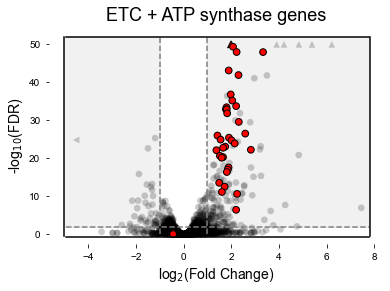

In [23]:
ax = plt.gca()
ax.set_facecolor('w')
mscatter(
    data['log$_2$(Fold Change)'].values, data['-log$_1$$_0$(FDR)'].values,
    c='black',
    edgecolors='none',
    m=data['marker'].tolist(),
    s=45,
    alpha=0.2,
    ax=ax)
mscatter(
    data_1a['log$_2$(Fold Change)'].values, data_1a['-log$_1$$_0$(FDR)'].values,
    c='red',
    edgecolors='black',
    m=data_1a['marker'].tolist(),
    s=45,
    alpha=1,
    ax=ax)

ax.set_xlabel('log$_2$(Fold Change)', fontsize=14)
ax.set_ylabel('-log$_1$$_0$(FDR)', fontsize=14)
ax.set_title('ETC + ATP synthase genes', fontsize=18)

l_box = matplotlib.patches.Rectangle((1,2), 6.75, 50, alpha=0.3, color="lightgrey", zorder=-10)
r_box = matplotlib.patches.Rectangle((-5,2), 4, 50, alpha=0.3, color="lightgrey", zorder=-10)
ax.add_patch(l_box)
ax.add_patch(r_box)
ax.axhline(2, xmin=0.05, xmax=0.955, ls='--', color="grey")
ax.axvline(-1, ymin=0.048, ymax=0.955, ls='--', color="grey")
ax.axvline(1, ymin=0.048, ymax=0.955, ls='--', color="grey")

ax.axhline(-0.75, xmin=0.05, xmax=0.955, ls='-', color="black")
ax.axvline(-5, ymin=0.038, ymax=0.953, ls='-', color="black")
ax.axhline(52, xmin=0.05, xmax=0.955, ls='-', color="black")
ax.axvline(7.8, ymin=0.038, ymax=0.953, ls='-', color="black")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="x", direction="out", pad=5, which="both")
ax.tick_params(axis="y", direction="out", pad=5, which="both")

# Save and show figure
plt.savefig(
    os.path.join(os.getcwd(), "plots", "volcano_plot_etc_atp_genes.pdf"),
    bbox_inches='tight'
)

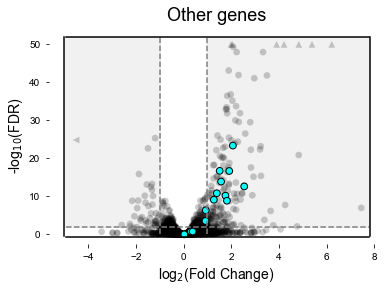

In [24]:
ax = plt.gca()
ax.set_facecolor('w')
mscatter(
    data['log$_2$(Fold Change)'].values, data['-log$_1$$_0$(FDR)'].values,
    c='black',
    edgecolors='none',
    m=data['marker'].tolist(),
    s=45,
    alpha=0.2,
    ax=ax)
mscatter(
    data_1b['log$_2$(Fold Change)'].values, data_1b['-log$_1$$_0$(FDR)'].values,
    c='cyan',
    edgecolors='black',
    m=data_1b['marker'].tolist(),
    s=45,
    alpha=1,
    ax=ax)

ax.set_xlabel('log$_2$(Fold Change)', fontsize=14)
ax.set_ylabel('-log$_1$$_0$(FDR)', fontsize=14)
ax.set_title('Other genes', fontsize=18)

l_box = matplotlib.patches.Rectangle((1,2), 6.75, 50, alpha=0.3, color="lightgrey", zorder=-10)
r_box = matplotlib.patches.Rectangle((-5,2), 4, 50, alpha=0.3, color="lightgrey", zorder=-10)
ax.add_patch(l_box)
ax.add_patch(r_box)
ax.axhline(2, xmin=0.05, xmax=0.955, ls='--', color="grey")
ax.axvline(-1, ymin=0.048, ymax=0.955, ls='--', color="grey")
ax.axvline(1, ymin=0.048, ymax=0.955, ls='--', color="grey")

ax.axhline(-0.75, xmin=0.05, xmax=0.955, ls='-', color="black")
ax.axvline(-5, ymin=0.038, ymax=0.953, ls='-', color="black")
ax.axhline(52, xmin=0.05, xmax=0.955, ls='-', color="black")
ax.axvline(7.8, ymin=0.038, ymax=0.953, ls='-', color="black")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="x", direction="out", pad=5, which="both")
ax.tick_params(axis="y", direction="out", pad=5, which="both")

# Save and show figure
plt.savefig(
    os.path.join(os.getcwd(), "plots", "volcano_plot_other_genes.pdf"),
    bbox_inches='tight'
)

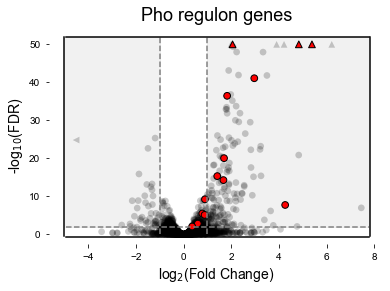

In [25]:
ax = plt.gca()
ax.set_facecolor('w')
mscatter(
    data['log$_2$(Fold Change)'].values, data['-log$_1$$_0$(FDR)'].values,
    c='black',
    edgecolors='none',
    m=data['marker'].tolist(),
    s=45,
    alpha=0.2,
    ax=ax)
mscatter(
    data_2['log$_2$(Fold Change)'].values, data_2['-log$_1$$_0$(FDR)'].values,
    c='red',
    edgecolors='black',
    m=data_2['marker'].tolist(),
    s=45,
    alpha=1,
    ax=ax)

ax.set_xlabel('log$_2$(Fold Change)', fontsize=14)
ax.set_ylabel('-log$_1$$_0$(FDR)', fontsize=14)
ax.set_title('Pho regulon genes', fontsize=18)

l_box = matplotlib.patches.Rectangle((1,2), 6.75, 50, alpha=0.3, color="lightgrey", zorder=-10)
r_box = matplotlib.patches.Rectangle((-5,2), 4, 50, alpha=0.3, color="lightgrey", zorder=-10)
ax.add_patch(l_box)
ax.add_patch(r_box)
ax.axhline(2, xmin=0.05, xmax=0.955, ls='--', color="grey")
ax.axvline(-1, ymin=0.048, ymax=0.955, ls='--', color="grey")
ax.axvline(1, ymin=0.048, ymax=0.955, ls='--', color="grey")

ax.axhline(-0.75, xmin=0.05, xmax=0.955, ls='-', color="black")
ax.axvline(-5, ymin=0.038, ymax=0.953, ls='-', color="black")
ax.axhline(52, xmin=0.05, xmax=0.955, ls='-', color="black")
ax.axvline(7.8, ymin=0.038, ymax=0.953, ls='-', color="black")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="x", direction="out", pad=5, which="both")
ax.tick_params(axis="y", direction="out", pad=5, which="both")

# Save and show figure
plt.savefig(
    os.path.join(os.getcwd(), "plots", "volcano_plot_pho_geneset1.pdf"),
    bbox_inches='tight'
)

In [13]:
genelist_4 = [
    "VTC1",
    "PHO5",
    "VTC2",
    "PHO86",
    "VTC3",
    "SPL2",
    "VTC4",
    "PHO81",
    "PHO89",
    "PHO84",
    "PHO8",
    "PHO12",
    "PHO11",
    "PHM8"
]

In [14]:
data_4 = data[data['common_name'].isin(genelist_4)]

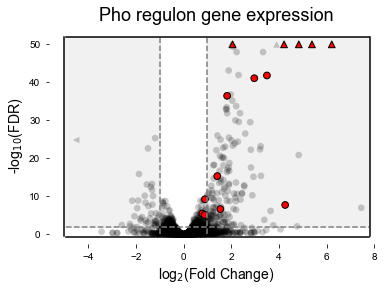

In [28]:
ax = plt.gca()
ax.set_facecolor('w')
mscatter(
    data['log$_2$(Fold Change)'].values, data['-log$_1$$_0$(FDR)'].values,
    c='black',
    edgecolors='none',
    m=data['marker'].tolist(),
    s=45,
    alpha=0.2,
    ax=ax)
mscatter(
    data_4['log$_2$(Fold Change)'].values, data_4['-log$_1$$_0$(FDR)'].values,
    c='red',
    edgecolors='black',
    m=data_4['marker'].tolist(),
    s=45,
    alpha=1,
    ax=ax)

ax.set_xlabel('log$_2$(Fold Change)', fontsize=14)
ax.set_ylabel('-log$_1$$_0$(FDR)', fontsize=14)
ax.set_title('Pho regulon gene expression', fontsize=18)

l_box = matplotlib.patches.Rectangle((1,2), 6.75, 50, alpha=0.3, color="lightgrey", zorder=-10)
r_box = matplotlib.patches.Rectangle((-5,2), 4, 50, alpha=0.3, color="lightgrey", zorder=-10)
ax.add_patch(l_box)
ax.add_patch(r_box)
ax.axhline(2, xmin=0.05, xmax=0.955, ls='--', color="grey")
ax.axvline(-1, ymin=0.048, ymax=0.955, ls='--', color="grey")
ax.axvline(1, ymin=0.048, ymax=0.955, ls='--', color="grey")

ax.axhline(-0.75, xmin=0.05, xmax=0.955, ls='-', color="black")
ax.axvline(-5, ymin=0.038, ymax=0.953, ls='-', color="black")
ax.axhline(52, xmin=0.05, xmax=0.955, ls='-', color="black")
ax.axvline(7.8, ymin=0.038, ymax=0.953, ls='-', color="black")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="x", direction="out", pad=5, which="both")
ax.tick_params(axis="y", direction="out", pad=5, which="both")

# Save and show figure
plt.savefig(
    os.path.join(os.getcwd(), "plots", "volcano_plot_pho_geneset2.pdf"),
    bbox_inches='tight'
)

In [16]:
etc_atp_gene_list = {
    "Mitochondrial NADH Dehydrogenase": [
        "NDE1",
        "NDE2",
        "NDI1"
    ],
    "Complex II": [
        "SDH1",
        "SDH2",
        "SDH3",
        "SDH4"
    ],
    "Complex III": [
        "CYT1",
        "COB", #COB
        "COR1",
        "QCR2",
        "QCR6",
        "QCR7",
        "QCR8",
        "QCR9",
        "QCR10",
        "RIP1"
    ],
    "Cytochrome C": [
        "CYC1",
        "CYC7"
    ],
    "Complex IV": [
        "COX1",
        "COX2",
        "COX3",
        "COX4",
        "COX5A",
        "COX5B",
        "COX6",
        "COX7",
        "COX8",
        "COX9",
        "COX12",
        "COX13"
    ],
    "ATP synthase": [
        "ATP1",
        "ATP2",
        "ATP3",
        "ATP4",
        "ATP5",
        "ATP6",
        "ATP7",
        "ATP8",
        "ATP14",
        "ATP15",
        "ATP16",
        "ATP17",
        "ATP18",
        "ATP19",
        "ATP20",
        "OLI1",
        "TIM11"
    ]
}

In [17]:
# Source: https://colorbrewer2.org/#type=qualitative&scheme=Dark2&n=6
resp_colors = {
    "Mitochondrial NADH Dehydrogenase": "#1b9e77",
    "Complex II": "#d95f02",
    "Complex III": "#7570b3",
    "Cytochrome C": "#e7298a",
    "Complex IV": "#66a61e",
    "ATP synthase": "#e6ab02"
}

Missing genes: ['COB']
Missing genes: ['COX1', 'COX2', 'COX3']
Missing genes: ['ATP6', 'ATP8', 'OLI1']


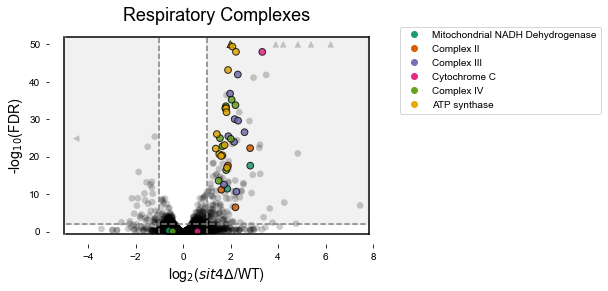

In [27]:
ax = plt.gca()
ax.set_facecolor('w')
mscatter(
    data['log$_2$(Fold Change)'].values, data['-log$_1$$_0$(FDR)'].values,
    c='black',
    edgecolors='none',
    m=data['marker'].tolist(),
    s=45,
    alpha=0.2,
    ax=ax)

for k, v in etc_atp_gene_list.items():
    name = k
    genes = v
    color = resp_colors[name]
    data_resp = data[data['common_name'].isin(genes)]
    missing = []
    for x in genes:
        if x not in data['common_name'].values.tolist():
            missing.append(x)
    if len(missing) > 0:
        print("Missing genes: " + str(missing))
    mscatter(
        data_resp['log$_2$(Fold Change)'].values, data_resp['-log$_1$$_0$(FDR)'].values,
        c=color,
        edgecolors='black',
        m=data_resp['marker'].tolist(),
        s=45,
        alpha=0.8,
        ax=ax)

ax.set_xlabel('log$_2$($\it{sit4}$$\Delta$/WT)', fontsize=14)
ax.set_ylabel('-log$_1$$_0$(FDR)', fontsize=14)
ax.set_title('Respiratory Complexes', fontsize=18)

l_box = matplotlib.patches.Rectangle((1,2), 6.75, 50, alpha=0.3, color="lightgrey", zorder=-10)
r_box = matplotlib.patches.Rectangle((-5,2), 4, 50, alpha=0.3, color="lightgrey", zorder=-10)
ax.add_patch(l_box)
ax.add_patch(r_box)
ax.axhline(2, xmin=0.05, xmax=0.955, ls='--', color="grey")
ax.axvline(-1, ymin=0.048, ymax=0.955, ls='--', color="grey")
ax.axvline(1, ymin=0.048, ymax=0.955, ls='--', color="grey")

ax.axhline(-0.75, xmin=0.05, xmax=0.955, ls='-', color="black")
ax.axvline(-5, ymin=0.048, ymax=0.953, ls='-', color="black")
ax.axhline(52, xmin=0.05, xmax=0.955, ls='-', color="black")
ax.axvline(7.8, ymin=0.048, ymax=0.953, ls='-', color="black")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="x", direction="out", pad=5, which="both")
ax.tick_params(axis="y", direction="out", pad=5, which="both")

g = lambda m,c: plt.plot([],[], marker='o', color=c, ls="none")[0]
handles_g = [g("s", list(resp_colors.values())[i]) for i in range(len(list(resp_colors.values())))]
plt.legend(handles_g, [x for x in list(resp_colors.keys())], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Save and show figure
plt.savefig(
    os.path.join(os.getcwd(), "plots", "volcano_plot_resp_complex.pdf"),
    bbox_inches='tight'
)